# Libraries

In [3]:
# install.packages('rpart')

Installing package into ‘/home/ggomarr/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [4]:
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(rpart)

# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 2 - Regression/Section 8 - Decision Tree Regression"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Position_Salaries.csv')[c('Level','Salary')]
str(df)

'data.frame':	10 obs. of  2 variables:
 $ Level : int  1 2 3 4 5 6 7 8 9 10
 $ Salary: int  45000 50000 60000 80000 110000 150000 200000 300000 500000 1000000


# Decision tree model

In [9]:
dt_reg=rpart(formula=Salary~Level,data=df,
             control=rpart.control(minsplit=1))
summary(dt_reg)

Call:
rpart(formula = Salary ~ Level, data = df, control = rpart.control(minsplit = 1))
  n= 10 

          CP nsplit  rel error   xerror      xstd
1 0.77638626      0 1.00000000 1.234568 0.7835133
2 0.15496716      1 0.22361374 1.153813 0.7914228
3 0.05217357      2 0.06864658 1.118716 0.7958581
4 0.01000000      3 0.01647301 1.118716 0.7958581

Variable importance
Level 
  100 

Node number 1: 10 observations,    complexity param=0.7763863
  mean=249500, MSE=8.066225e+10 
  left son=2 (8 obs) right son=3 (2 obs)
  Primary splits:
      Level < 8.5 to the left,  improve=0.7763863, (0 missing)

Node number 2: 8 observations,    complexity param=0.05217357
  mean=124375, MSE=6.921484e+09 
  left son=4 (6 obs) right son=5 (2 obs)
  Primary splits:
      Level < 6.5 to the left,  improve=0.7600316, (0 missing)

Node number 3: 2 observations,    complexity param=0.1549672
  mean=750000, MSE=6.25e+10 
  left son=6 (1 obs) right son=7 (1 obs)
  Primary splits:
      Level < 9.5 to the left, 

In [14]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

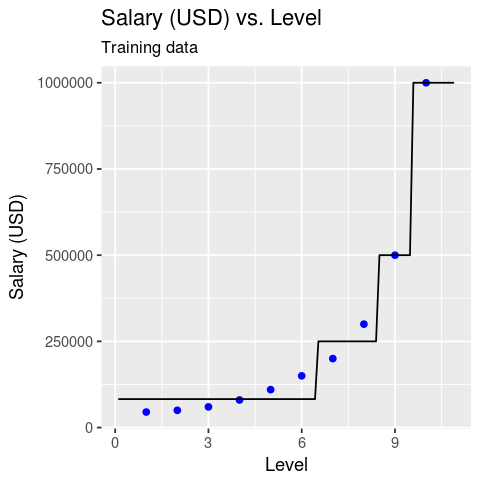

In [17]:
x_plot=range_plot_X(df$Level,100,0.1)
ggplot() +
    geom_point(aes(x=df$Level,y=df$Salary),
               colour='blue') +
    geom_line(aes(x=x_plot,y=predict(dt_reg,data.frame(Level=x_plot))),
              colour='black') +
    ggtitle('Salary (USD) vs. Level',subtitle='Training data') +
    xlab('Level') + 
    ylab('Salary (USD)')

In [18]:
predict(dt_reg,data.frame(Level=6.5))

1 
250000